In [18]:
import itertools

import pandas as pd
import numpy as np
from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = np.genfromtxt('../Data/AFM/10-10-Z')

print (data.dtype)

float64


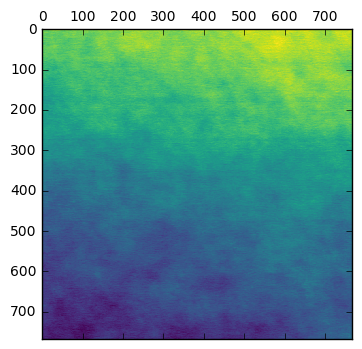

In [12]:
plt.matshow(data, cmap = 'viridis')

In [16]:
bkg = np.empty([768, 768])

print (bkg.dtype)

float64


In [ ]:
def polynm_background(raw, n):
    """
    This function takes in a raw spectra as a .txt file and a user desired degree, n, of polynomial
    fitting. It returns the background matrix and the backgrounded data as np arrays
    """

#take in raw .txt file

#generate raw data matrix

#if n = 0
    #call 0th degree background
...
#if n = 4
    #call 4th degree background
    
#least squares fitting to desired degree

#fill empty array with background

#subtract background from raw data

    return bkg, bkg_subtracted

In [ ]:
#0th degree polynomial

# B(x,y) = a0

In [ ]:
#1st degree polynomial

# B(x,y) = a0 + a1x + a2y

In [ ]:
# 2nd degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2

In [ ]:
# 3rd degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2 + a6x^3 + a7x^2y + a8xy^2 + a9y^3

In [ ]:
# 4th degree polynomial

# B(x,y) = a0 + a1x + a2y + a3x^2 + a4xy + a5y^2 + a6x^3 + a7x^2y + a8xy^2 + a9y^3 + a10x^4 + a11x^3y + a12x^2y^2
#         + a13xy^3 + a14y^4

In [ ]:
def main():
    # Generate Data...
    numdata = 100
    x = np.random.random(numdata)
    y = np.random.random(numdata)
    z = x**2 + y**2 + 3*x**3 + y + np.random.random(numdata)

    # Fit a 3rd order, 2d polynomial
    m = polyfit2d(x,y,z)

    # Evaluate it on a grid...
    nx, ny = 20, 20
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx), 
                         np.linspace(y.min(), y.max(), ny))
    zz = polyval2d(xx, yy, m)

    # Plot
    plt.imshow(zz, extent=(x.min(), y.max(), x.max(), y.min()))
    plt.scatter(x, y, c=z)
    plt.show()

def polyfit2d(x, y, z, order=3):
    ncols = (order + 1)**2
    G = np.zeros((x.size, ncols))
    ij = itertools.product(range(order+1), range(order+1))
    for k, (i,j) in enumerate(ij):
        G[:,k] = x**i * y**j
    m, _, _, _ = np.linalg.lstsq(G, z)
    return m

def polyval2d(x, y, m):
    order = int(np.sqrt(len(m))) - 1
    ij = itertools.product(range(order+1), range(order+1))
    z = np.zeros_like(x)
    for a, (i,j) in zip(m, ij):
        z += a * x**i * y**j
    return z

main()